# Stackoverflow Survey Data 2017: Insights

In [1]:
import pandas as pd
import numpy as np

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [3]:
%autosave 0

Autosave disabled


In [4]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth', -1)

<div class="alert alert-block alert-info">
# Introduction to the DataSet

<b>Stackoverflow hosts the world's largest community of professional software developers. </b>

Every year, it conducts a massive survey of users on it's website, covering all sorts of information: 
<ul><b>
    <li>educational background, 
    <li>demographic data, 
    <li>nature of the organization where they are working/ studying , 
    <li>job role and languages they are working on and aspire to work on,
    <li>self learning 
    <li>preferences for potential jobs 
    <li>important metrics for hiring other developers...    
    </b>
</ul>
This dataset is taken from the survey conducted in 2017. Each row corresponds to one respondent. The survey comprised of 153 questions. List of questions is mentioned below.

In [5]:
Introduction = pd.read_csv('survey_results_schema.csv',index_col =0)

In [6]:
Introduction.drop(labels=['ProgramHobby','YearsCodedJobPast','ExCoderReturn','ExCoderNotForMe','ExCoderBalance','ExCoder10Years',\
                 'ExCoderBelonged','ExCoderSkills','ExCoderWillNotCode','ExCoderActive','ClickyKeys',\
                'Overpaid','TimeAfterBootcamp','VersionControl','CheckInCode','ShipIt','OtherPeoplesCode',\
                'OtherPeoplesCode','ProjectManagement','EnjoyDebugging','InTheZone','DifficultCommunication',\
                'StackOverflowModeration','StackOverflowCommunity','StackOverflowHelpful','StackOverflowBetter',\
                'StackOverflowWhatDo','StackOverflowMakeMoney','SurveyLong','QuestionsInteresting',\
                 'QuestionsConfusing','InterestedAnswers','ExpectedSalary','PronounceGIF','TabsSpaces','IDE',\
                'Methodology','Currency','HaveWorkedFramework','WantWorkFramework',\
                'HaveWorkedDatabase','WantWorkDatabase','WantWorkPlatform','MobileDeveloperType','WebDeveloperType',\
                'EquipmentSatisfiedMonitors','EquipmentSatisfiedCPU','EquipmentSatisfiedRAM','EquipmentSatisfiedStorage',\
                 'EquipmentSatisfiedRW','InfluenceInternet','InfluenceWorkstation','InfluenceHardware','InfluenceServers',\
                 'InfluenceTechStack','InfluenceDeptTech','InfluenceVizTools','InfluenceDatabase','InfluenceCloud',\
                 'InfluenceConsultants','InfluenceRecruitment','InfluenceCommunication'],inplace=True)

In [7]:
Introduction

,Question
Column,
Respondent,Respondent ID number
Professional,Which of the following best describes you?
Country,In which country do you currently live?
University,"Are you currently enrolled in a formal, degree-granting college or university program?"
EmploymentStatus,Which of the following best describes your current employment status?
FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
HomeRemote,How often do you work from home or remotely?
CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


<div class="alert alert-block alert-info">
# Preparing DataFrame / Data Cleaning

In [8]:
df = pd.read_csv('survey_results_public.csv',index_col=0)

In [9]:
df.shape

(51392, 153)

In [10]:
df.head(1)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very

### Step 1: We dropped the columns that we believe will not be relevant to our analysis and where the number of Nan values are more than 40,000  


In [11]:
df.drop(columns=['ProgramHobby','YearsCodedJobPast','ExCoderReturn','ExCoderNotForMe','ExCoderBalance','ExCoder10Years',\
                 'ExCoderBelonged','ExCoderSkills','ExCoderWillNotCode','ExCoderActive','ClickyKeys',\
                'Overpaid','TimeAfterBootcamp','VersionControl','CheckInCode','ShipIt','OtherPeoplesCode',\
                'OtherPeoplesCode','ProjectManagement','EnjoyDebugging','InTheZone','DifficultCommunication',\
                'StackOverflowModeration','StackOverflowCommunity','StackOverflowHelpful','StackOverflowBetter',\
                'StackOverflowWhatDo','StackOverflowMakeMoney','SurveyLong','QuestionsInteresting',\
                 'QuestionsConfusing','InterestedAnswers','ExpectedSalary','PronounceGIF','TabsSpaces','IDE',\
                'Methodology','Currency','HaveWorkedFramework','WantWorkFramework',\
                'HaveWorkedDatabase','WantWorkDatabase','WantWorkPlatform','MobileDeveloperType','WebDeveloperType',\
                'EquipmentSatisfiedMonitors','EquipmentSatisfiedCPU','EquipmentSatisfiedRAM','EquipmentSatisfiedStorage',\
                 'EquipmentSatisfiedRW','InfluenceInternet','InfluenceWorkstation','InfluenceHardware','InfluenceServers',\
                 'InfluenceTechStack','InfluenceDeptTech','InfluenceVizTools','InfluenceDatabase','InfluenceCloud',\
                 'InfluenceConsultants','InfluenceRecruitment','InfluenceCommunication'],inplace=True)

In [12]:
df.shape

(51392, 92)

### Step 2:  Replace the columns with Likert scale answers into numbers ranging from 1 to 5, with 5 being the highest rating:
<ul>
    <li>Strongly agree/ Very important/ Very satisfied/ I am the final decision maker/ Several times = <b> 5 </b>
    <li>Agree/ Important/ Satisfied/ A lot of influence/ At least once each week = <b> 4</b>
    <li>Somewhat agree/ Somewhat important/ Somewhat satisfied/ Some influence/ At least once each day = <b> 3 </b>
    <li>Disagree/ Not very important/ Not very satisfied/ Not much influence/ Once or twice = <b> 2 </b>
    <li>Strongly disagree/ Not at all important/ Not at all satisfied/ No influence at all/ Haven't done at all = <b> 1</b>
</ul>

Nan = 0


In [13]:
df.replace({'Strongly agree':5.0, 'Very important':5.0, 'Very satisfied':5.0, 'I am the final decision maker':5.0,\
           'Several times':5.0,\
            'Agree':4.0, 'Important':4.0, 'Satisfied':4.0, 'A lot of influence':4.0,'At least once each week':4.0,\
           'Somewhat agree':3.0, 'Somewhat important':3.0, 'Somewhat satisfied':3.0, 'Some influence':3.0,\
            'At least once each day':3.0,\
           'Disagree':2.0, 'Not very important':2.0, 'Not very satisfied':2.0, 'Not much influence':2.0,\
            'Once or twice':2.0,\
           'Strongly disagree':1.0, 'Not at all important':1.0, 'Not at all satisfied':1.0,\
            'No influence at all':1.0, 'Haven\'t done at all':1.0},inplace=True)


### Step 3:  Cleaning the various text columns for improving readability and analysis; and converted text values into numbers wherever possible


In [14]:
#Column: Profession

df.Professional.replace({'Professional developer':'Developer',\
            'Professional non-developer who sometimes writes code':'Non-Developer',\
           'Used to be a professional developer':'Ex-Developer',\
           'None of these':'None'},inplace=True)

In [15]:
# column: University
def Univ_values(value):
    if value == 'No':
        return 0
    elif value == 'Yes, full-time':
        return 1
    elif value == 'Yes, part-time':
        return 0.5
    else:
        return ('None')
    


df['University'] = df.University.apply(Univ_values)

In [16]:
# Column: EmploymentStatus

df.EmploymentStatus.replace({'Not employed, and not looking for work':'NotEmployedNotLooking',\
            'Independent contractor, freelancer, or self-employed':'Self-Employed',\
            'Not employed, but looking for work':'NotEmployedLooking',\
            'I prefer not to say':0},inplace=True)

In [17]:
# Column: MajorUndergrad

df.MajorUndergrad.replace({'Computer science or software engineering':1, \
           'Computer engineering or electrical/electronics engineering':1,\
           'Computer programming or Web development':1,\
           'Information technology, networking, or system administration':1,\
           'Management information systems':1},inplace=True)

def Undergrad(x):
    if x == 1:
        return 1
    else:
        return 0
    
df['MajorUndergrad'] = df.MajorUndergrad.apply(Undergrad)    

In [18]:
# Column: HomeRemote
def remote(x):
    if (x == 'More than half, but not all, the time'): 
        return 1
    elif (x=='All or almost all the time (I\'m full-time remote'):
        return 1
    elif (x=='About half the time'):
        return 1
    else:
        return 0


df['HomeRemote'] = df.HomeRemote.apply(remote)

In [19]:
# Column: CompanySize

df.CompanySize.replace({'Fewer than 10 employees':'0 - 10', '10 to 19 employees':'10-19', '20 to 99 employees':'20-99',
           '100 to 499 employees':'100-499','500 to 999 employees':'500-999','1,000 to 4,999 employees':'1000-4999',\
           '5,000 to 9,999 employees':'5000-9900','10,000 or more employees':'>=10K','I don\'t know':0,\
           'I prefer not to answer':0},inplace=True)

df.CompanySize.fillna(value=0,inplace=True)

In [20]:
# Column: CompanyType

df.CompanyType.replace({'Privately-held limited company, not in startup mode':'Private',\
                       'Publicly-traded corporation':'Public', \
                        'Sole proprietorship or partnership, not in startup mode':'Private',\
                       'Government agency or public school/university': 'Govt/NotforProfit',
                       'Venture-funded startup':'Startup', 'Pre-series A startup':'Startup',\
                       'Non-profit/non-governmental organization or private school/university':'Govt/NotforProfit',\
                       'State-owned company':'Govt/NotforProfit', 'Something else':0,'I don\'t know':0,\
                       'I prefer not to answer':0},inplace=True)

df.CompanyType.fillna(value=0,inplace=True)

In [21]:
# Column: YearsProgram

df.YearsProgram.replace({'Less than a year': 1,'1 to 2 years': 2,'2 to 3 years':3,'3 to 4 years':4,'4 to 5 years':5,\
                         '5 to 6 years':6,'6 to 7 years':7,'7 to 8 years':8,'8 to 9 years':9,'9 to 10 years':10,\
                         '10 to 11 years':11,'11 to 12 years':12,'12 to 13 years':13,'13 to 14 years':14,\
                         '14 to 15 years':15,'15 to 16 years':16,'16 to 17 years':17,'17 to 18 years':18,\
                         '18 to 19 years':19,'19 to 20 years':20,'20 or more years':20},inplace=True)
df.YearsProgram.fillna(0,inplace=True)

In [22]:
# Column: YearsCodedJob

df.YearsCodedJob.replace({'Less than a year': 1,'1 to 2 years': 2,'2 to 3 years':3,'3 to 4 years':4,'4 to 5 years':5,\
                         '5 to 6 years':6,'6 to 7 years':7,'7 to 8 years':8,'8 to 9 years':9,'9 to 10 years':10,\
                         '10 to 11 years':11,'11 to 12 years':12,'12 to 13 years':13,'13 to 14 years':14,\
                         '14 to 15 years':15,'15 to 16 years':16,'16 to 17 years':17,'17 to 18 years':18,\
                         '18 to 19 years':19,'19 to 20 years':20,'20 or more years':20},inplace=True)
df.YearsCodedJob.fillna(0,inplace=True)

In [23]:
#Column : DeveloperType

df['DeveloperType'] = df['DeveloperType'].astype(str)

role = df.DeveloperType.apply(lambda x: x.split(';'))

df['DeveloperRole'] = role.apply(lambda x: x[0])
df['DeveloperRole'].replace({'Developer with a statistics or mathematics background':'DS_ML_Dev',
                            'Data scientist':'DS_ML_Dev','Machine learning specialist':'DS_ML_Dev',
                            'DevOps specialist':'DevOps_Dev','Database administrator':'DevOps_Dev',\
                             'Systems administrator':'DevOps_Dev',
                             'Embedded applications/devices developer':'Embedded_Dev'},inplace=True)
df['DeveloperRole'].replace(to_replace='nan', value='None',inplace=True)
                                                               

df.drop('DeveloperType', axis=1, inplace=True)

In [24]:
# Column: JobSeekingStatus

df.JobSeekingStatus.replace({'I\'m not actively looking, but I am open to new opportunities':0.5,
                            'I am not interested in new job opportunities':0,
                            'I am actively looking for a job':1},inplace=True)

df.JobSeekingStatus.fillna(0,inplace=True)

In [25]:
# Column : Gender  
df['Gender'] = df.Gender.apply(lambda x : 'Male' if x=='Male' else 'Female' if x=='Female' else 'Other')


In [26]:
# Column : Race

def Race_type(x):
    if x == 'White or of European descent': 
        return 'White/European'
    elif x == 'South Asian':
        return 'South Asian'
    elif x == 'Hispanic or Latino/Latina':
        return 'Hispanic'
    elif x == 'East Asian':
        return 'East Asian'
    elif x == 'Middle Eastern':
        return 'Middle Eastern'
    elif x == 'Black or of African descent':
        return 'African'
    else:
        return 'Others' 

    
df['Race'] = df.Race.apply(Race_type)    

In [27]:
# Column : LearnedHiring

df['LearnedHiring'] = df['LearnedHiring'].astype(str)

def Hiring(source):
    if 'family member' in source:
        return 'Network'
    elif 'recruiter' in source:
        return 'Recruiter'
    elif 'job board' in source:
        return 'Job Board'
    elif 'career fair' in source:
        return 'Career Fair'
    elif 'Web site' in source:
        return 'Company Website'
    else:
        return 'Others'
    
df['JobSearch_Source'] = df.LearnedHiring.apply(Hiring)

In [28]:
# Column: AuditoryEnvironment
df.AuditoryEnvironment.replace({'Turn on some music':'Music',
                               'Keep the room absolutely quiet':'Silence',
                               'Put on some ambient sounds (e.g. whale songs, forest sounds)':'White Noise',
                                'Something else':'Others',
                                'Put on a movie or TV show':'TV/Movie',
                                'Turn on the news or talk radio':'Radio/News'
                               },inplace=True)

df.AuditoryEnvironment.fillna(0,inplace=True)

### Step 4: Creating new columns in the dataframe for the following lang proficiencies: <i> JavaScript, Java, SQL, Python, C# </i>

In [29]:
# Column: HaveWorkedLanguage

df['HaveWorkedLanguage'] = df['HaveWorkedLanguage'].astype(str)

#Replace all JavaScript with JScript 
df['HaveWorkedLanguage'] = df.HaveWorkedLanguage.apply(lambda x: 'JScript' if 'JavaScript' in x else x)

# Create new columns for each language proficiency
df['JavaScript'] = (df.HaveWorkedLanguage.str.contains('JScript')) * 1.0
df['Java'] = (df.HaveWorkedLanguage.str.contains('Java')) * 1.0
df['SQL'] = (df.HaveWorkedLanguage.str.contains('SQL')) * 1.0
df['Python'] = (df.HaveWorkedLanguage.str.contains('Python')) * 1.0
df['C#'] = (df.HaveWorkedLanguage.str.contains('C#')) * 1.0

In [30]:
# Column: WantWorkLanguage

df['WantWorkLanguage'] = df['WantWorkLanguage'].astype(str)

#Replace all JavaScript with JScript 
df['WantWorkLanguage'] = df.WantWorkLanguage.apply(lambda x: 'JScript' if 'JavaScript' in x else x)

# Create new columns for each want to work language 
df['WantWork_JavaScript'] = (df.WantWorkLanguage.str.contains('JScript')) * 1.0
df['WantWork_Python'] = (df.WantWorkLanguage.str.contains('Python')) * 1.0
df['WantWork_SQL'] = (df.WantWorkLanguage.str.contains('SQL')) * 1.0
df['WantWork_Java'] = (df.WantWorkLanguage.str.contains('Java')) * 1.0
df['WantWork_C#'] = (df.WantWorkLanguage.str.contains('C#')) * 1.0

### Step 5: Creating new columns to enumerate Formal Education,  various self education modes and highest education of parents

In [31]:
# Column: FormalEducation 

df.loc[df.FormalEducation == 'I never completed any formal education','EducationNum'] = 0
df.loc[df.FormalEducation == 'I prefer not to answer','EducationNum'] = 0
df.loc[df.FormalEducation == 'Primary/elementary school','EducationNum'] = 1
df.loc[df.FormalEducation == 'Secondary school','EducationNum'] = 2
df.loc[df.FormalEducation == 'Some college/university study without earning a bachelor\'s degree','EducationNum'] = 3
df.loc[df.FormalEducation == 'Bachelor\'s degree','EducationNum'] = 4
df.loc[df.FormalEducation == 'Master\'s degree','EducationNum'] = 5
df.loc[df.FormalEducation == 'Professional degree','EducationNum'] = 6 
df.loc[df.FormalEducation == 'Doctoral degree','EducationNum'] = 7

df.EducationNum.fillna(0,inplace=True)

In [32]:
# Column: EducationTypes
df['EducationTypes'] = df['EducationTypes'].astype(str)

df['Edu_Self'] = (df.EducationTypes.str.contains('Self')) * 1.0
df['Edu_Online'] = (df.EducationTypes.str.contains('Online')) * 1.0
df['Edu_OpenSource'] = (df.EducationTypes.str.contains('Open')) * 1.0
df['Edu_OTJ'] = (df.EducationTypes.str.contains('training')) * 1.0
df['Edu_Hack'] = (df.EducationTypes.str.contains('Hackathon')) * 1.0
df['Edu_CodeComp'] = (df.EducationTypes.str.contains('Coding')) * 1.0
df['Edu_Parttime'] = (df.EducationTypes.str.contains('Part')) * 1.0
df['Edu_Cert'] = (df.EducationTypes.str.contains('certification')) * 1.0
df['Edu_BootC'] = (df.EducationTypes.str.contains('Bootcamp')) * 1.0

df.drop('EducationTypes', axis=1, inplace=True)

In [33]:
# Column: HighestEducationParents

df.loc[df.HighestEducationParents == 'I don\'t know/not sure','Parent_EducationNum'] = 0
df.loc[df.HighestEducationParents == 'I prefer not to answer','Parent_EducationNum'] = 0
df.loc[df.HighestEducationParents == 'No education','Parent_EducationNum'] = 0
df.loc[df.HighestEducationParents == 'Primary/elementary school','Parent_EducationNum'] = 1
df.loc[df.HighestEducationParents == 'High school','Parent_EducationNum'] = 2
df.loc[df.HighestEducationParents == 'Some college/university study, no bachelor\'s degree','Parent_EducationNum'] = 3
df.loc[df.HighestEducationParents == 'A bachelor\'s degree','Parent_EducationNum'] = 4
df.loc[df.HighestEducationParents == 'A master\'s degree','Parent_EducationNum'] = 5
df.loc[df.HighestEducationParents == 'A professional degree','Parent_EducationNum'] = 6 
df.loc[df.HighestEducationParents == 'A doctoral degree','Parent_EducationNum'] = 7

df.Parent_EducationNum.fillna(0,inplace=True)

### Step 6: Converting all Nan values in int/float columns to 0

In [34]:
for col in df:
    dt = df[col].dtype 
    if dt == int or dt == float:
        df[col].fillna(0,inplace=True)

In [35]:
# Writing the cleaned dataframe to a new file.
df.reset_index(inplace=True)
df.to_csv('cleaned_survey_results.csv')

In [36]:
df.head(1)

,Respondent,Professional,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,EducationImportant,SelfTaughtTypes,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedPlatform,AuditoryEnvironment,CollaborateRemote,MetricAssess,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,Gender,HighestEducationParents,Race,Salary,DeveloperRole,JobSearch_Source,JavaScript,Java,SQL,Python,C#,WantWork_JavaScript,WantWork_Python,WantWork_SQL,WantWork_Java,WantWork_C#,EducationNum,Edu_Self,Edu_Online,Edu_OpenSource,Edu_OTJ,Edu_Hack,Edu_CodeComp,Edu_Parttime,Edu_Cert,Edu_BootC,Parent_EducationNum
0,1,Student,United States,0,NotEmployedNotLooking,Secondary school,0,0,0,0,3.0,0.0,NaN,0.0,0.0,5.0,5.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,2.0,5.0,5.0,1.0,4.0,4.0,2.0,4.0,0.5,0.0,Not applicable/ never,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,3.0,Stock options; Vacation/days off; Remote options,Other,NaN,nan,4.0,4.0,4.0,3.0,4.0,2.0,2.0,1.0,3.0,5.0,0.0,NaN,NaN,6:00 AM,Swift,Swift,iOS,Music,0.0,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Desktop; iOS app,4.0,1.0,2.0,1.0,1.0,5.0,5.0,2.0,3.0,1.0,Male,High school,White/European,0.0,None,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


# General data visualizations

## 1. Top countries by number of  respondents

In [37]:
df_country = df.groupby('Country').size().sort_values(ascending=False).nlargest(10)

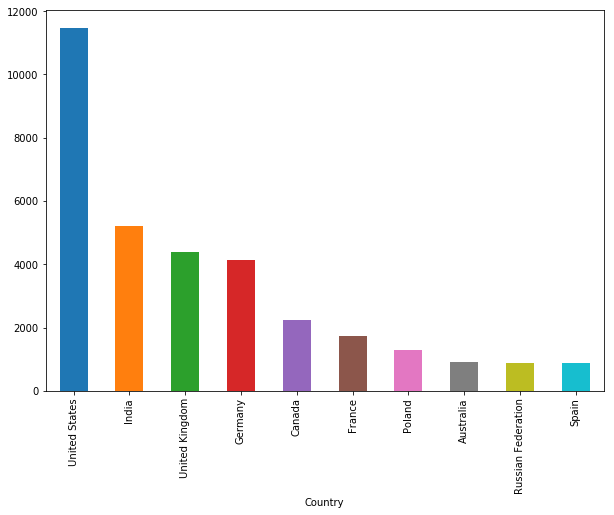

In [38]:
df_country.plot(y=df_country.index, x= df_country.values, kind='bar',figsize=(10,7))

## 2. Proportion of Male and Female Respondents 

In [39]:
import plotly.plotly as py
import plotly.graph_objs as go

male_count = len(df[df.Gender=='Male'])
female_count = len(df[df.Gender=='Female'])
trace = go.Pie(labels=['Male','Female'], values=[male_count,female_count])
py.iplot([trace], filename='basic_pie_chart')

## 3. Respondents by Developer Role

In [40]:
df_dev = df[(df.DeveloperRole != 'None') & (df.DeveloperRole != 'Other')].groupby('DeveloperRole').size().sort_values(ascending=False)

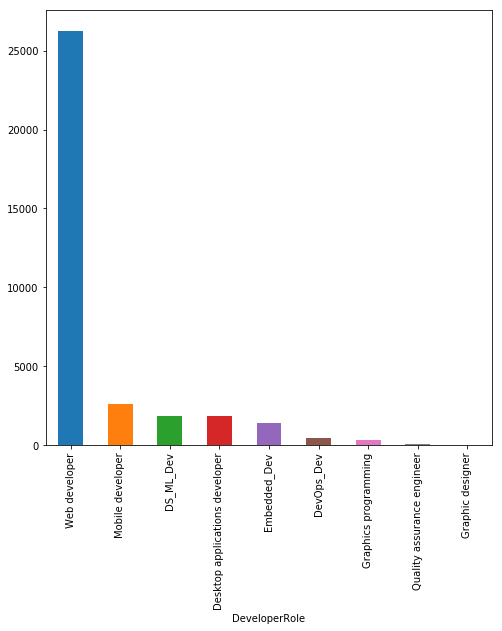

In [41]:
df_dev.plot(y=df_dev.index, x= df_dev.values, kind='bar',figsize=(8,8) )

## 4. Years of Programming Experience by Gender

In [42]:
df['years_exp_age_bins'] = pd.cut(df['YearsProgram'],bins=[0,5,10,15,20])
df_age_gen = df[(df.Gender != 'Other')].groupby(['years_exp_age_bins','Gender'])['Respondent'].count().reset_index()
df_age_gen_male =  df_age_gen[df_age_gen.Gender=='Male']
df_age_gen_female =  df_age_gen[df_age_gen.Gender=='Female']

In [43]:
fig = {
  "data": [
    {
      "values": df_age_gen_male.Respondent.values,
      "labels": [
        "(0,5)",
        "(5,10)",
        "(10,15)",
        "(15,20)",
        ],
      "domain": {"x": [0, .48]},
      "name": "Male with Years_Exp",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": df_age_gen_female.Respondent.values,
      "labels": [
        "(0,5)",
        "(5,10)",
        "(10,15)",
        "(15,20)",
        ],
      #"text":["Female with Years_Exp"],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Female with Years_Exp",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Years Exp with Gender",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Male",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Female",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

<div class="alert alert-block alert-info">
# Trends and Insights

## 1. Relationship between Self-learning (beyond formal education), Years of experience and Gender of respondents

### Step 1: Select all the newly created columns on Self-learning, YearsProgram, Gender and other relevant columns

In [44]:
df2 = df.loc[:,['YearsProgram','Edu_Self','Edu_Online','Edu_OpenSource','Edu_OTJ','Edu_Hack','Edu_CodeComp',\
                'Edu_Parttime','Edu_Cert','Edu_BootC','Gender','EducationNum','MajorUndergrad']]

### Step 2: Create bins for years of experience

In [45]:
df2['years_exp_age_bins'] = pd.cut(df2['YearsProgram'],bins=[0,5,10,15,20])

### Step 3: Calculate the average for self-learning and each self learning mode for males and females across each experience bin

In [46]:
gender_edu = df2[df2.Gender!='Other'].groupby(['years_exp_age_bins','Gender'])['Edu_Self','Edu_Online',\
'Edu_OpenSource','Edu_OTJ','Edu_Hack','Edu_CodeComp','Edu_Parttime','Edu_Cert','Edu_BootC'].mean().reset_index()

gender_edu['x_axis'] =['0_to_5 Female','0_to_5 Male','5_to_10 Female','5_to_10 Male','10_to_15 Female',\
                       '10_to_15 Male','15_to_20 Female','15_to_20 Male']

Text(0.5,0,'Years Experience & Gender')

Text(0,0.5,'Mean')

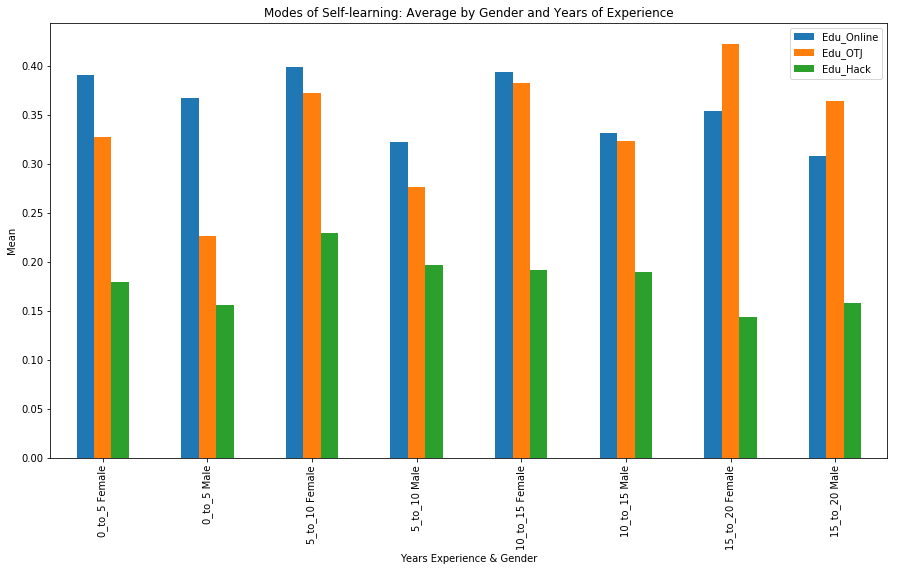

In [47]:
gender_edu.plot(x='x_axis', y=['Edu_Online','Edu_OTJ','Edu_Hack'], kind='bar', figsize=(15,8),\
           title='Modes of Self-learning: Average by Gender and Years of Experience')

plt.xlabel('Years Experience & Gender')
plt.ylabel('Mean')

<div class="alert alert-block alert-success"> 
### Key Finding:  For each experience group, females use online learning platforms, on the job training and <i> participate in hackathons </i> much more as compared to males. 


### For ease of understanding above graph, we combined all the parameters by gender in the graph below :

In [48]:
genderCombined_edu = df2[df2.Gender!='Other'].groupby(['Gender'])['Edu_Online',\
'Edu_OpenSource','Edu_OTJ','Edu_Hack','Edu_CodeComp','Edu_Parttime','Edu_Cert','Edu_BootC'].mean().reset_index()

Text(0,0.5,'Mean')

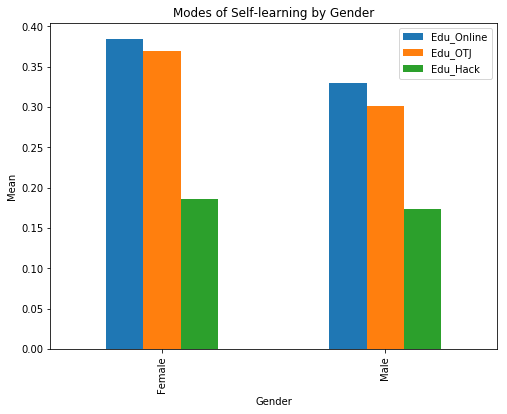

In [49]:
genderCombined_edu.plot(x='Gender', y=['Edu_Online','Edu_OTJ','Edu_Hack'], kind='bar', figsize=(8,6),\
           title='Modes of Self-learning by Gender')

plt.ylabel('Mean')

### Step 4: To corroborate the finding above, we calculated average rating of various job parameters that applicants assess when applying to potential jobs by Gender:

In [50]:
df3 = df.copy()

In [51]:
plot_df3 = df3[(df3.Gender != 'Other')].groupby('Gender').agg({'HoursPerWeek':'mean','JobSecurity':'mean',\
                                                  'JobSatisfaction':'mean','AssessJobIndustry':'mean',
                                                  'AssessJobRole':'mean',\
                   'AssessJobExp':'mean','AssessJobDept':'mean','AssessJobTech':'mean','AssessJobProjects':'mean',\
                    'AssessJobCompensation':'mean','AssessJobOffice':'mean','AssessJobCommute':'mean',\
                    'AssessJobRemote':'mean','AssessJobLeaders':'mean','AssessJobProfDevel':'mean',\
                   'AssessJobDiversity':'mean','AssessJobProduct':'mean','AssessJobFinances':'mean'}).reset_index()

In [52]:
plot_df3

,Gender,HoursPerWeek,JobSecurity,JobSatisfaction,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances
0,Female,1.907308,3.004231,5.682692,1.882692,1.936923,1.968846,1.987308,2.166154,2.086538,2.170769,2.185000,2.124615,1.863077,1.797308,2.298077,1.868462,1.857308,1.895769
1,Male,1.540568,2.744405,5.832948,1.807401,1.897401,1.921492,1.909462,2.162588,2.066321,2.207224,2.148279,2.108076,1.839533,1.746526,2.266865,1.567001,1.842002,1.887841


In [53]:
trace2 = go.Bar(
    x=['AssessJobIndustry','AssessJobRole','AssessJobDept','AssessJobProfDevel',\
                            'AssessJobLeaders','AssessJobProduct'],
    y=[1.88, 1.93, 1.98, 2.29, 1.79, 1.85 ],
    name='Female'
)
trace1 = go.Bar(
    x=['AssessJobIndustry','AssessJobRole','AssessJobDept','AssessJobProfDevel',\
                            'AssessJobLeaders','AssessJobProduct'],
    y=[1.80, 1.89, 1.90, 2.26, 1.74, 1.84],
    name='Male'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

<div class="alert alert-block alert-success"> 
 <b>We found that females give more importance and consideration to the following  parameters than males ,
<ul>
    <li>the industry and specific role/ title they are apply to (AssessJobIndustry & AssessJobRole)    
    <li>specific department and team they will be working on(AssessJobDept)  
    <li>opportunities for professional development (AssessJobProfDevel)  
    <li>Leaders they will be working with (AssessJobLeaders) 
    <li>impact of the product or service (AssessJobProduct)  </b>

### Machine Learning for Self - learning and Years of Experience: Clustering Approach

In [54]:
ML_df2 = pd.get_dummies(df2,columns=['Gender'])

In [55]:
ML_df2.drop(columns=['Gender_Other','years_exp_age_bins'], inplace=True)

Using Clustering on above columns to find relevant relationships 

In [56]:
from sklearn.cluster import KMeans

In [57]:
clu = KMeans(n_clusters=3, random_state=0)

In [58]:
clu.fit(ML_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [59]:
ML_df2['cluster']= clu.labels_

In [60]:
ML_df2.groupby('cluster').mean()

,YearsProgram,Edu_Self,Edu_Online,Edu_OpenSource,Edu_OTJ,Edu_Hack,Edu_CodeComp,Edu_Parttime,Edu_Cert,Edu_BootC,EducationNum,MajorUndergrad,Gender_Female,Gender_Male
cluster,,,,,,,,,,,,,,
0,18.615686,0.626748,0.278230,0.303897,0.318812,0.141818,0.121310,0.108508,0.143248,0.064322,4.152321,0.666273,0.041141,0.726742
1,4.247174,0.441090,0.257375,0.144058,0.178155,0.123242,0.125540,0.082667,0.045630,0.052201,3.343994,0.548387,0.057669,0.507214
2,10.472930,0.564739,0.274319,0.236354,0.258586,0.161459,0.147648,0.081912,0.086712,0.041067,3.933082,0.723466,0.050447,0.654184


<div class="alert alert-block alert-success"> 
### Insight for Managers: 
The finding above illustrates that females give more importance to professional development opportunities and hence look for professional development both within their organization and are also more willing to undertake part-time training to enhance their skill set. This insight is useful for HR of organizations that they should create opportunities for women to learn in their current roles and also for managers to provide women with such opportunites so they are more satisfied with their role.

##  2: Relationship between Salary, Developer Type and Language Skills

In [61]:
df8 = df.copy()

### Step 1: Filtered respondents by Country == 'United States' and where the Salary was not null and selected relevant columns

In [62]:
df8 = df8.loc[(df8.Country== 'United States') & (df8.Salary != 0),['YearsProgram','Gender','Race','Salary',\
                                                                   'EducationNum','JavaScript','Java','SQL',\
                                                                   'Python','C#','DeveloperRole','Edu_Self']]

### Step 2: Identified developer roles with average salaries  > 100K

In [63]:
topDevroles_salary = df8[(df8.DeveloperRole != 'None') & (df8.DeveloperRole != 'Other')].\
groupby('DeveloperRole')['Salary'].mean().nlargest(4)

### Step 3: Calculated average language skills of developers with the highest salaries 

In [64]:
topDevroles_langSkills = df8[(df8['DeveloperRole'].isin(topDevroles_salary.index))].groupby('DeveloperRole')\
['JavaScript','Java','SQL','Python','C#'].mean().reset_index()

Text(0.5,0,'Developer Roles with mean Salary > 100K')

Text(0,0.5,'Language Proficiency')

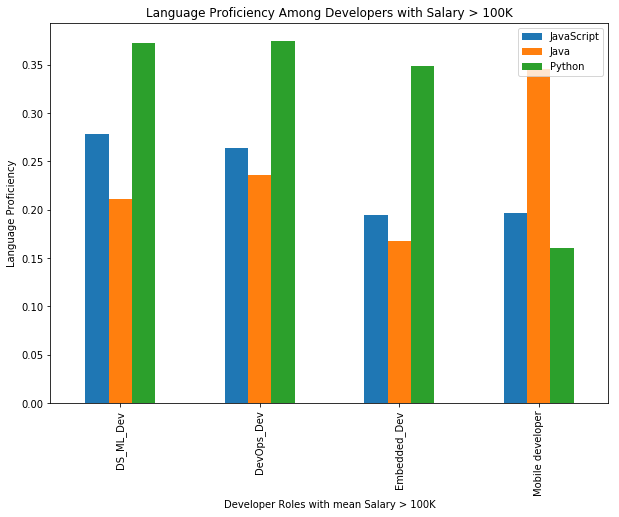

In [65]:
topDevroles_langSkills.plot(x='DeveloperRole', y=['JavaScript','Java','Python'],kind='bar', \
                            figsize=(10,7), title = 'Language Proficiency Among Developers with Salary > 100K')

plt.xlabel('Developer Roles with mean Salary > 100K')
plt.ylabel('Language Proficiency')

<div class="alert alert-block alert-success"> 
### Key Finding: Developers earning the highest salaries are working in the field of DataScience/ Machine Learning, DevOps, Embedded and Mobile applications and have higher proficiency in Python among all the language skills. 


### Step 4:  We tried to explore this by looking at the languages that users have stated they want to work on

In [66]:
WantWork_lang = df[(df.Professional != 'None')].groupby('Professional')['WantWork_JavaScript','WantWork_Python',\
                                            'WantWork_SQL','WantWork_Java','WantWork_C#'].mean() * 100
WantWork_lang.reset_index(inplace=True)

Text(0.5,0,'Professional Status')

Text(0,0.5,'% of users ')

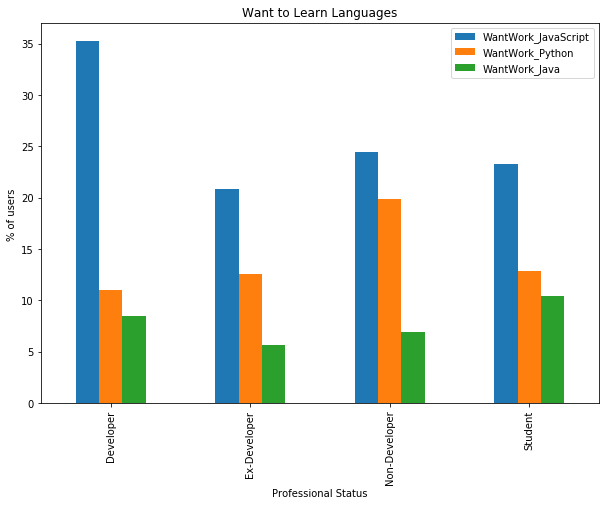

In [67]:
WantWork_lang.plot(x='Professional', y=['WantWork_JavaScript','WantWork_Python',\
                                            'WantWork_Java'],kind='bar', figsize=(10,7),\
                  title ='Want to Learn Languages')
plt.xlabel('Professional Status')
plt.ylabel('% of users ')

<div class="alert alert-block alert-success"> 
### In the graph above, we see that Python is the second highest rated language after JavaScript, which users have stated they want to work on.

### Machine Learning : Clustering Approach 

In [68]:
#Preparing Dataframe for Machine Learning
ML_df8 = pd.get_dummies(df8,columns=['Gender','Race','DeveloperRole'])

# Dropping irrelevant columns
ML_df8.drop(columns=['Gender_Other','Race_Others','DeveloperRole_Graphic designer',\
                     'DeveloperRole_Graphics programming','DeveloperRole_None','DeveloperRole_Other',\
                    'DeveloperRole_Quality assurance engineer'],inplace=True)

In [69]:
# Running cluster after identifying ideal number of clusters
clu1 = KMeans(n_clusters=2, random_state=0)

clu1.fit(ML_df8)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [70]:
ML_df8['cluster'] = clu1.labels_

In [71]:
ML_df8.groupby('cluster').mean()

,YearsProgram,Salary,EducationNum,JavaScript,Java,SQL,Python,C#,Edu_Self,Gender_Female,Gender_Male,Race_African,Race_East Asian,Race_Hispanic,Race_Middle Eastern,Race_South Asian,Race_White/European,DeveloperRole_DS_ML_Dev,DeveloperRole_Desktop applications developer,DeveloperRole_DevOps_Dev,DeveloperRole_Embedded_Dev,DeveloperRole_Mobile developer,DeveloperRole_Web developer
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,15.848065,127091.216638,4.131716,0.619295,0.122473,0.114385,0.134604,0.096476,0.699018,0.074523,0.820913,0.013865,0.030618,0.024263,0.005199,0.030618,0.722704,0.075101,0.045061,0.021953,0.041594,0.053726,0.694396
1,10.701951,70106.083549,3.871707,0.685366,0.093659,0.107317,0.096098,0.101463,0.650732,0.105366,0.795122,0.014634,0.018537,0.021463,0.006341,0.023902,0.746341,0.045366,0.064390,0.016585,0.037561,0.036585,0.761951


<div class="alert alert-block alert-success"> 
### Insights for Managers: 
Since we know that the developer community engaged on Stackoverflow is wanting to learn Python and we also know that Python is among the most popular skills for top earning developers, Engagement Managers at stackoverflow can use this insight to attract relevant ads from companies that provide online courses/ trainings/ bootcamps in Python. They can showcase this finding to the target companies and improve their ad-clicks by showcasing relevant content on their website.

## 3: Compensation Benefits(other than Salary) and their relationship with Race and Country

### Step 1: Selecting all relevant columns including Country, Race, Important Benefits & Years Program

In [72]:
df6_c = df.loc[:,['Country','Race','ImportantBenefits','YearsProgram','EducationNum','Professional']]

### Step 2: Cleaning 'Important Benefits' column

In [73]:
df6_c['ImportantBenefits'] = df6_c['ImportantBenefits'].astype(str)

df6_c['IB_Retirement'] = (df6_c.ImportantBenefits.str.contains('Retirement')) * 1.0
df6_c['IB_Vac'] = (df6_c.ImportantBenefits.str.contains('Vacation')) * 1.0
df6_c['IB_Health'] = (df6_c.ImportantBenefits.str.contains('Health')) * 1.0
df6_c['IB_Work_hrs'] = (df6_c.ImportantBenefits.str.contains('work')) * 1.0
df6_c['IB_Remote'] = (df6_c.ImportantBenefits.str.contains('Remote')) * 1.0
df6_c['IB_Equipment'] = (df6_c.ImportantBenefits.str.contains('Equipment')) * 1.0
df6_c['IB_Stock'] = (df6_c.ImportantBenefits.str.contains('Stock')) * 1.0


df6_c.drop(columns='ImportantBenefits', inplace=True)

### Step 3: Calculating the top 5 countries based on responses received 

In [74]:
Country_counts = df6_c.groupby(['Country']).size().nlargest(5)

### Step 4: Calculating the top 5 Races based on responses received 

In [75]:
Race_counts = df6_c[df6_c.Race!='Others'].groupby(['Race']).size().nlargest(5)

### Step 5: Average 'Important Benefits' grouped by Race

In [76]:
race_IB = df6_c[(df6_c['Race'].isin(Race_counts.index))].groupby(['Race'])\
       ['IB_Vac','IB_Health','IB_Remote','IB_Equipment','IB_Retirement','IB_Stock'].mean().reset_index()

Text(0,0.5,'Mean/Average')

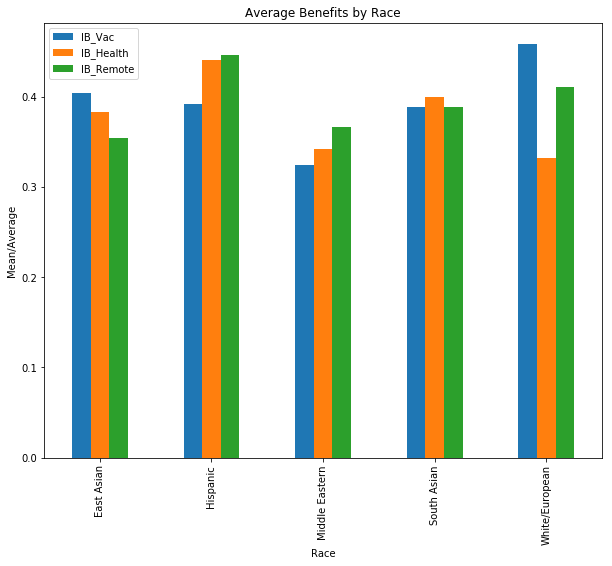

In [77]:
race_IB.plot(x='Race', y=['IB_Vac','IB_Health','IB_Remote'], \
                kind='bar', figsize=(10,8), title='Average Benefits by Race')

plt.ylabel('Mean/Average')

<div class="alert alert-block alert-success"> 
### In the graph above, we see that respondents belonging to White/European race value vacation and remote work benefits much more than healthcare, whereas respondents from Hispanic and Middle Eastern races value health benefits more than vacation and remote work. In order to further delve into the reason for these differences, we have tried to determine which country do the respondents from each race primarily belong to...

### Step 6: For each Race, calculate the number of respondents from the top 5 Countries 

In [78]:
df6_country_dum = df6_c.copy()
df6_country_dum = pd.get_dummies(df6_country_dum,columns=['Country'])

In [79]:
country_with_race = df6_country_dum[(df6_country_dum.Race!='Others') & (df6_country_dum.Race!='African')].groupby('Race')\
['Country_Germany','Country_Canada','Country_India','Country_United States','Country_United Kingdom'].mean()*100

In [80]:
country_with_race.reset_index(inplace=True)

Text(0,0.5,'% Respondents')

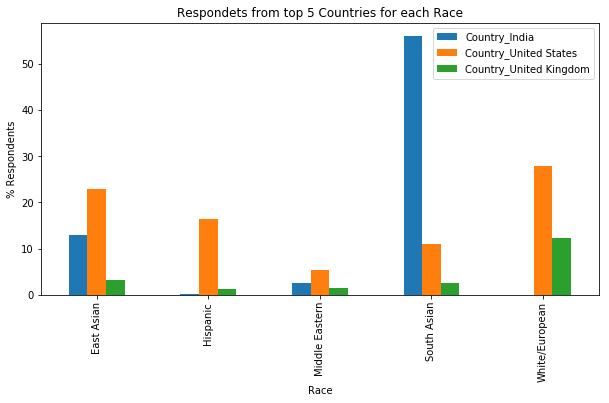

In [81]:
country_with_race.plot(x='Race', y=['Country_India','Country_United States',\
                                    'Country_United Kingdom'],kind='bar', figsize=(10,5),\
                      title='Respondets from top 5 Countries for each Race')

plt.ylabel('% Respondents')

#### From the graph above we see that, respondents from the White/European, Hispanic and Middle Eastern races primarily belong to United States. Thus, despite working in the same country, with nearly similar facilities available, respondents still evaluate compensation benefits differently.

<div class="alert alert-block alert-success"> 
### Key Finding: Race plays an important part in how respondents evaluate Compensation Benefits. Within United States, respondents belonging to White/European race value Vacation & Remote work much higher than Health care. Whereas, respondents belonging to Hispanic Race value Remote work & Health care more than White respondents. 



### Machine Learning: Decision Tree and Clustering Approach

#### Preparing dataframe for Machine Learning by selecting top 5 Countries & top 5 Races from the dataset

In [82]:
ML_df6 = df6_c.loc[(df6_c.Country.isin(Country_counts.index)) & (df6_c.Race.isin(Race_counts.index))]

In [83]:
ML_df6 = pd.get_dummies(ML_df6,columns=['Country','Race','Professional'])

In [84]:
ML_df6.isna().any().sum()

0

### Preparing X & Y variables with Y being Vacation benefit (1 is Yes, 0 is No)

In [85]:
ML_df6.IB_Vac.value_counts()

0.0    8377
1.0    7764
Name: IB_Vac, dtype: int64

In [86]:
X = ML_df6.drop('IB_Vac',axis=1)

In [87]:
Y = ML_df6.IB_Vac

### Executing the Decision Tree to identify important variables

In [88]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [89]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

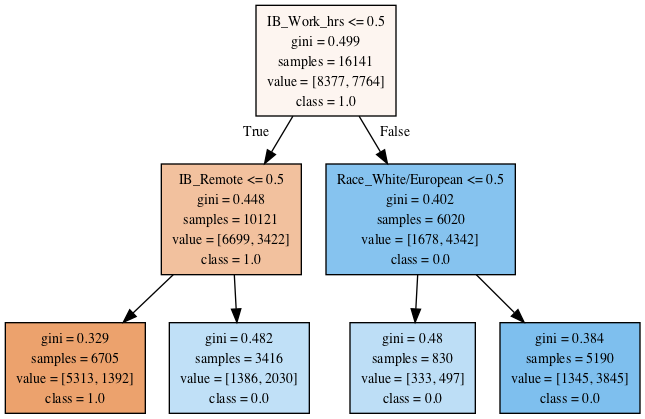

In [90]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Using Clustering approach to identify the races which value Vacation benefits more

In [91]:
from sklearn.cluster import KMeans

clu6 = KMeans(n_clusters=2, random_state=0)
clu6.fit(ML_df6)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [92]:
ML_df6['cluster']= clu6.labels_

In [93]:
ML_df6.groupby('cluster').mean()

,YearsProgram,EducationNum,IB_Retirement,IB_Vac,IB_Health,IB_Work_hrs,IB_Remote,IB_Equipment,IB_Stock,Country_Canada,Country_Germany,Country_India,Country_United Kingdom,Country_United States,Race_East Asian,Race_Hispanic,Race_Middle Eastern,Race_South Asian,Race_White/European,Professional_Developer,Professional_Ex-Developer,Professional_Non-Developer,Professional_None,Professional_Student
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,18.223737,4.129148,0.294644,0.496627,0.398183,0.389095,0.444444,0.307449,0.108495,0.087292,0.177200,0.027537,0.202396,0.505576,0.020515,0.014181,0.006333,0.047639,0.911331,0.859838,0.033182,0.087567,0.009913,0.009500
1,6.653751,3.586393,0.225163,0.468236,0.378013,0.359766,0.381505,0.310543,0.107344,0.086957,0.157806,0.167380,0.172787,0.415071,0.050574,0.019937,0.012728,0.179883,0.736878,0.672111,0.008448,0.101712,0.020275,0.197454


<div class="alert alert-block alert-success"> 
### Insight for Managers: 
From this insight we can conclude that Race plays an important role in how respondents assess the various Compensation benefits despite working in the same Country. Hence, while providing compensation benefits, HR from companies should not offer standard set of benefits & instead evaluate the preferences of employees and try to tailor the benefits to their needs to ensure employee satisfaction.